In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("SAT_Results.csv").replace({'s': 0}, regex=False)
df['Num of SAT Test Takers'] = df['Num of SAT Test Takers'].astype(float)
df['SAT Critical Reading Avg. Score'] = df['SAT Critical Reading Avg. Score'].astype(float)
df['SAT Math Avg. Score'] = df['SAT Math Avg. Score'].astype(float)
df['SAT Writing Avg. Score'] = df['SAT Writing Avg. Score'].astype(float)
 
# Take a subset of the data to make plots clearer.
df_sat = df.loc[
    ((df['DBN'] == '01M539') | (df['DBN'] == '02M047')),
    ['DBN', 'Num of SAT Test Takers', 'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
     'SAT Writing Avg. Score']
]

# Make a copy of the data to add jitter to and plot.
df_jittered = df_sat.loc[:, 'SAT Critical Reading Avg. Score':'SAT Writing Avg. Score'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)

# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()




LinAlgError: Arrays cannot be empty

In [ ]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

means = df[['SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score']].mean(axis=0)
stds = df[['SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score']].std(axis=0)
features['reading_math_writing'] = ((df[['SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score']]
plotdf['reading_math_writing'] = features['reading_math_writing'] 
corrmat2 = plotdf.corr()

print(corrmat2)

In [3]:
# Take a subset of the data to make plots clearer.
print(df.head())

print(df.DBN.unique())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

   Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                    29.0                            355.0   
1                    91.0                            383.0   
2                    70.0                            377.0   
3                     7.0                            414.0   
4                    44.0                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  
0                404.0                   363.0  
1                423.0                   366.0  
2                402.0                   370.0  
3                401.0                   359.0  
4                433.

In [7]:
features = pd.get_dummies(df['DBN'])

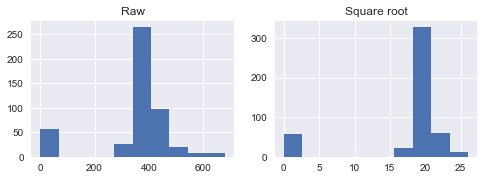

In [8]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['SAT Critical Reading Avg. Score'].dropna())
plt.title('Raw')

# fig.add_subplot(222)
# plt.hist(np.log(df['SAT Critical Reading Avg. Score'].dropna()))
# plt.title('Log')

fig.add_subplot(222)
plt.hist(np.sqrt(df['SAT Critical Reading Avg. Score'].dropna()))
plt.title('Square root')

# ax3=fig.add_subplot(223)
# plt.hist(1/df['SAT Critical Reading Avg. Score'].dropna())
# plt.title('Inverse')
plt.show()


features['sqrt_critical_reading'] = np.sqrt(df['SAT Critical Reading Avg. Score'])

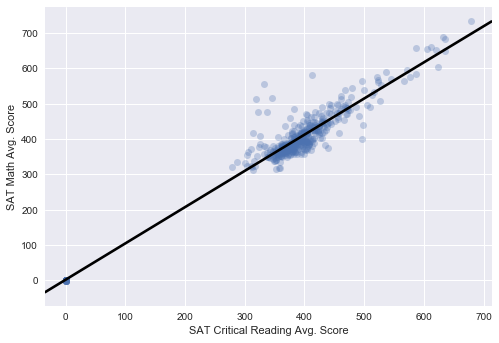

In [9]:
sns.regplot(
    df['SAT Critical Reading Avg. Score'],
    y=df['SAT Math Avg. Score'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['reading_squared'] = df['SAT Critical Reading Avg. Score'] * df['SAT Critical Reading Avg. Score']

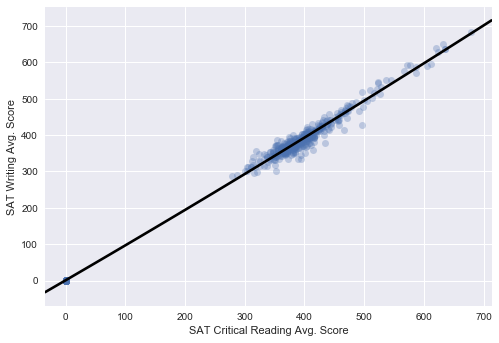

In [10]:
sns.regplot(
    df['SAT Critical Reading Avg. Score'],
    y=df['SAT Writing Avg. Score'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['writing_squared'] = df['SAT Writing Avg. Score'] * df['SAT Writing Avg. Score']

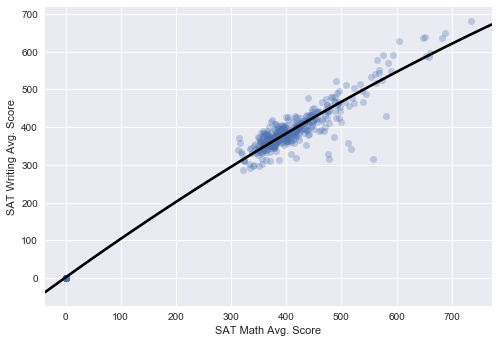

In [11]:
sns.regplot(
    df['SAT Math Avg. Score'],
    y=df['SAT Writing Avg. Score'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['math_squared'] = df['SAT Math Avg. Score'] * df['SAT Math Avg. Score']

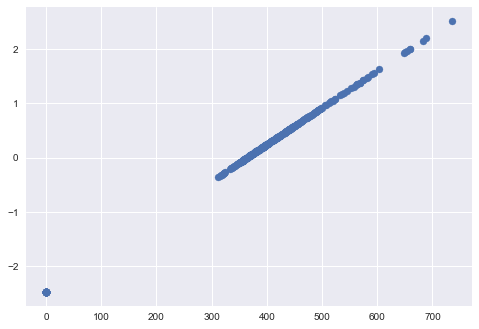

       Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
count            4.780000e+02                     4.780000e+02   
mean            -1.091642e-17                     4.386891e-17   
std              1.001048e+00                     1.001048e+00   
min             -6.472817e-01                    -2.514683e+00   
25%             -4.474320e-01                     3.703673e-02   
50%             -2.708981e-01                     2.204471e-01   
75%             -5.439424e-02                     4.181030e-01   
max              7.859654e+00                     2.321654e+00   

       SAT Math Avg. Score  SAT Writing Avg. Score  
count         4.780000e+02            4.780000e+02  
mean          1.227371e-16            7.641493e-17  
std           1.001048e+00            1.001048e+00  
min          -2.475917e+00           -2.496258e+00  
25%          -7.312738e-03            2.874487e-02  
50%           1.559008e-01            2.085884e-01  
75%           4.262231e-01        

In [12]:
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['SAT Math Avg. Score'], df_scaled['SAT Math Avg. Score'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())